# AnimateDiff


- ドキュメント:https://huggingface.co/docs/diffusers/main/en/api/pipelines/animatediff

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_to_video/animatediff.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install diffusers==0.23.0
!pip install accelerate==0.24.1
!pip install transformers==4.35.0
#!pip install opencv-contrib-python==4.8.0.76
#!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118
#!pip install controlnet_aux==0.0.3

In [6]:
import torch
from diffusers import MotionAdapter, AnimateDiffPipeline, DDIMScheduler
from diffusers.utils import export_to_gif

from IPython.display import Image

### AnimateDiffのダウンロード

In [ ]:
# Load the motion adapter
adapter = MotionAdapter.from_pretrained("guoyww/animatediff-motion-adapter-v1-5-2")

# load SD 1.5 based finetuned model
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"
pipe = AnimateDiffPipeline.from_pretrained(model_id, motion_adapter=adapter)
scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler", clip_sample=False, timestep_spacing="linspace", steps_offset=1)

# enable memory savings
pipe.enable_vae_slicing()
pipe.enable_model_cpu_offload()

In [ ]:
output = pipe(
    prompt=(
        "masterpiece, bestquality, highlydetailed, ultradetailed, sunset, "
        "orange sky, warm lighting, fishing boats, ocean waves seagulls, "
        "rippling water, wharf, silhouette, serene atmosphere, dusk, evening glow, "
        "golden hour, coastal landscape, seaside scenery"
    ),
    negative_prompt="bad quality, worse quality",
    num_frames=16,
    guidance_scale=7.5,
    num_inference_steps=25,
    generator=torch.Generator("cpu").manual_seed(42),
)
frames = output.frames[0]

In [5]:
frames

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

In [ ]:
export_to_gif(frames, "animation.gif")

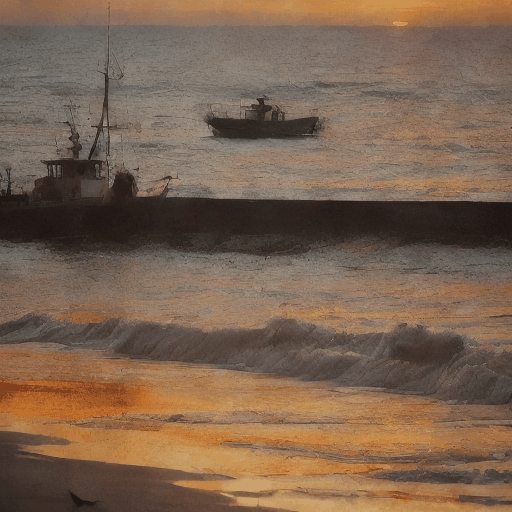

In [7]:
Image(filename="animation.gif")
